In [1]:
# import the libraries

## WebScrapping Libraries
from bs4 import BeautifulSoup
import requests
import urllib.request

## NLP and ML Libraries
import nltk
from newspaper import Article
nltk.download('floresta') # "Portuguese Treebank" divides the text into a list of sentences using ML algorithm
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Data Frame manipulation and Analytics Libraries
import pandas as pd
import time
import matplotlib.pyplot as py
import plotly_express as px
import plotly as plt
import datetime


[nltk_data] Downloading package floresta to
[nltk_data]     C:\Users\vinic\AppData\Roaming\nltk_data...
[nltk_data]   Package floresta is already up-to-date!


In [2]:
def scrape_mme_website(search,page):
    page_theme = search


    if page == 1:
        page = 0
    else:
        page = page*20

    page_number = str(page)
    url = 'https://www.gov.br/mme/pt-br/assuntos/noticias?b_start:int=' + page_number +'/' 
    webpage = requests.get(url)
    soup = BeautifulSoup(webpage.text, 'html.parser')
    article_links = soup.find_all('h2', attrs= {'class' : 'titulo'})

    for i in article_links:
        temp=0
        temp = i.find('a').get('href')
        links.append(temp)

    for i in range(len(links)):  # NLP Process: Scrapes the article, download the information and parse a nlp into a interable object
        article = Article(links[i]) # Scrapes the Article
        article.download()
        article.parse()
        article.nlp()

        # Interact with the articles
        titles.append(article.title)
        try:
            tags.append(BeautifulSoup(article.html, 'html.parser').find(id="form-widgets-categoria").get_text())
        except:
            tags.append(BeautifulSoup(article.html, 'html.parser').find(id="content").find('p', attrs= {'class':'nitfSubtitle'}).get_text())
        texts.append(article.text) 
        summarys.append(article.meta_description) 
        authors.append(BeautifulSoup(article.html, 'html.parser').find(id="content").find('p', attrs= {'class':'nitfSubtitle'}).get_text()) 
        themes.append(search)
        dates.append(BeautifulSoup(article.html, 'html.parser').find(id="plone-document-byline").get_text()[16:32])

        print(
        len(authors),  
        len(links), 
        len(themes), 
        len(tags), 
        len(titles),
        len(dates), 
        len(texts), 
        len(summarys)
        )
        
        if len(authors) == len(links):
            break
    



In [3]:

themes = []
tags = []
titles = []
authors = []
dates = []
links = []
texts = []
summarys = []
search = 'MME'
n = 3

# performs the scrapping with the chosen search on the given pages
for i in range(1 , n+1):

    #applies the function
    scrape_aneel_website(search, i )

1 20 1 1 1 1 1 1
2 20 2 2 2 2 2 2
3 20 3 3 3 3 3 3
4 20 4 4 4 4 4 4
5 20 5 5 5 5 5 5
6 20 6 6 6 6 6 6
7 20 7 7 7 7 7 7
8 20 8 8 8 8 8 8
9 20 9 9 9 9 9 9
10 20 10 10 10 10 10 10
11 20 11 11 11 11 11 11
12 20 12 12 12 12 12 12
13 20 13 13 13 13 13 13
14 20 14 14 14 14 14 14
15 20 15 15 15 15 15 15
16 20 16 16 16 16 16 16
17 20 17 17 17 17 17 17
18 20 18 18 18 18 18 18
19 20 19 19 19 19 19 19
20 20 20 20 20 20 20 20
21 40 21 21 21 21 21 21
22 40 22 22 22 22 22 22
23 40 23 23 23 23 23 23
24 40 24 24 24 24 24 24
25 40 25 25 25 25 25 25
26 40 26 26 26 26 26 26
27 40 27 27 27 27 27 27
28 40 28 28 28 28 28 28
29 40 29 29 29 29 29 29
30 40 30 30 30 30 30 30
31 40 31 31 31 31 31 31
32 40 32 32 32 32 32 32
33 40 33 33 33 33 33 33
34 40 34 34 34 34 34 34
35 40 35 35 35 35 35 35
36 40 36 36 36 36 36 36
37 40 37 37 37 37 37 37
38 40 38 38 38 38 38 38
39 40 39 39 39 39 39 39
40 40 40 40 40 40 40 40
41 60 41 41 41 41 41 41
42 60 42 42 42 42 42 42
43 60 43 43 43 43 43 43
44 60 44 44 44 44 44 44
45 60 4

In [4]:
# creates a dataframe based on the stored lists
df = pd.DataFrame( columns= ['dates','themes','authors','tags','titles','summarys','texts','links' ] )
df.dates = dates
df.dates = pd.to_datetime(df.dates)
df.authors = authors
df.tags = tags
df.titles = titles
df.summarys = summarys
df.texts = texts
df.links = links
df.themes = themes

# check the analyzed dates

df_filtered = df.loc[(df['dates'] > '2022-01-01')]

date_min = str(df_filtered.dates.dt.date.min().strftime('%d/%m/%Y'))+' at '+ str(df_filtered.dates.dt.time.min())
date_max = str(df_filtered.dates.dt.date.max().strftime('%d/%m/%Y'))+' at '+ str(df_filtered.dates.dt.time.max())
df_date_range = 'DF Date Rage: from ['+ date_min + '] to [' + date_max + ']'

print(df_date_range)

# checks if the dataframe has null values
df_filtered.isnull().sum()

DF Date Rage: from [05/02/2022 at 10:57:00] to [05/12/2022 at 19:48:00]


dates       0
themes      0
authors     0
tags        0
titles      0
summarys    0
texts       0
links       0
dtype: int64

In [19]:
# NLP: stopword parametres

## github patch with Brazilian stopwords
PORTUGUESE_STOPWORDS_PATCH_1 = r'https://gist.githubusercontent.com/alopes/5358189/raw/2107d809cca6b83ce3d8e04dbd9463283025284f/stopwords.txt' ##online patch
response_PATCH = requests.get(PORTUGUESE_STOPWORDS_PATCH_1) ## accessing via webscrapping
pt_stopwords = response_PATCH.text ## assigning to a variable
pt_stopwords = pt_stopwords.replace(" ","").splitlines() ## manipulating extraction

# WordCloud text and additional parameters

text = " ".join(s.lower() for s in df_filtered.texts) # lowercasing all the text words
wordcloud_theme = df_filtered.themes[0].lower() # get the search theme
wordcloud_search_theme = search
wordcloud_title = ('Author: MME' +' │ Theme: ' + 'Noticias' +' │ '+ df_date_range )# setting the title


## manual stopwords input
manual_stopwords = [wordcloud_theme,
    'cerca',
    'país',
    'disse',
    'agora',
    'ouvir',
    'notícia',
    'ano' ,
    'entanto',
    'episódio',
    'ainda',
    'acordo',
    'demanda',
    'maior',
    'dia',
    'segundo',
    'pode',
    'desde',
    'todo',
    'sobre',
    'getty',
    'getty images',
    'anadolu',
    'images',
    'agency',
    'ante',
    'após',
    'segunda',
    'terça',
    'quarta',
    'quinta',
    'sexta',
    'sabado',
    'domingo',
    'feira',
    'enquanto',
    'deve',
    'semana',
    'nesta',
    'caso',
    'diz',
    'hoje',
    'brasil',
    'empresa',
    'grande',
    'fonte',
    'renovável',
    'afirma',
    'área',
    'uso',
    'capacidade',
    'apenas',
    'partir',
    'projeto',
    'cnn',
    'passado',
    'partir',
    'porque',
    'custo',
    'exemplo',
    'especialista',
    'skydweller',
    'vai',
    'outra',
    'gera',
    'loja',
    'minas_energia',
    'twitter',
    'antigo',
    'minaseenergia',
    'flickr',
    'linkedin',
    'facebook',
    'social',
    'instauram',
    'gov',
    'br',
    'processo',
    'ascom',
    'setor',
    'lei',
    'gov br',
    'youtube',
    'comunicação',
    'evento',
    'oportunidade',
    'energia',
    'minas',
    'ministério',
    'ministro',
    'objetivo',
    'meio',
    'bihões',
    'assessoria',
    'programa',
    'produção',
    'além',
    'acesso',
    'especial',
    'bento albuquerque',
    'além disso',
    'termo',
    'fim',
    'novo',
    'necessidade',
    'final',
    'nova',
    'condições',
    'bento albuquerque'
    'bento',
    'albuquerque',
    'atendimento',
    'bento']

## stopwords used
stop_words  = list(pt_stopwords) + list(STOPWORDS) + list(manual_stopwords) 



# WordCloud NLP algorithm

## WordCloud Figure
wordcloud = WordCloud(min_font_size=50, 
               max_font_size=500, 
               background_color='white', 
               mode="RGB",
               colormap='tab10',
               stopwords=stop_words,
               width=3000, 
               height=1500,
               normalize_plurals= True
).generate(text)

## WordCloud Text Count
wordcloud_text = WordCloud(min_font_size=50, 
               max_font_size=500, 
               background_color='white', 
               mode="RGB",
               colormap='tab10',
               stopwords=stop_words,
               width=3000, 
               height=1500,
               normalize_plurals= True
).process_text(text)

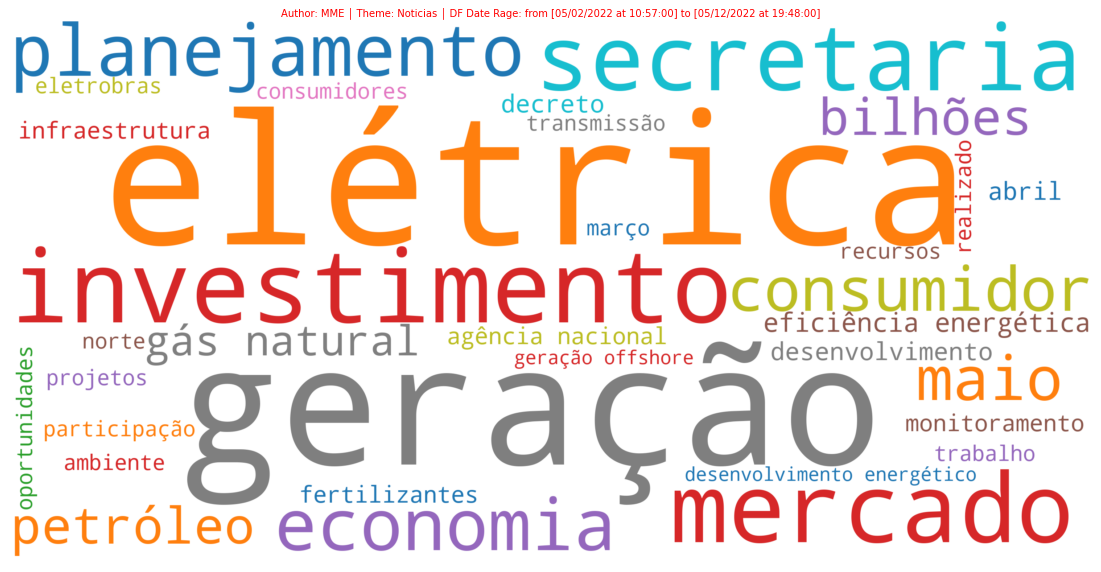

<Figure size 432x288 with 0 Axes>

In [20]:
# Ploting the WordCloud figure
py.figure(figsize=(20,10))
py.title(wordcloud_title, fontsize=10, color="red")
py.imshow(wordcloud, interpolation="bilinear")
py.axis("off")

fig1 = py.gcf()
py.show()
py.draw()
fig1.savefig(search+'.png', dpi=100)





In [125]:
# iterative scatter analysis with wordcloud words

## creating a dataframe with the dictionary generated by the NLP algorithm
df2 = pd.DataFrame.from_dict(wordcloud_text, orient='index') # generating a dataframe from a dictionary
df2 = df2.rename(columns={0:'count'}) 
df2['word'] = df2.index
df2 = df2.reset_index(drop=True)
df2 = df2[['word','count']]
df2.sort_values(by = ['count'],ascending = False,inplace = True, ignore_index = True)


In [126]:
## generating a scatterplot from the plotfy library
fig = px.scatter(df2.query('count > 10'),
                y="count",
                size="count",
                color="word",
                hover_name="word",
                log_x=True,
                title = wordcloud_title,
                width=1500, 
                height=750,
                size_max=60)
fig.show()

plt.offline.plot(fig, filename = search+'.html')

'aneel.html'

In [391]:
import openpyxl
df2.to_excel (search + '.xlsx', index = False, header=True)